In [ ]:
#import modules

import pandas as pd
import numpy as np
import json

#scikit learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification


from nltk.corpus import stopwords
import spacy
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns




In [ ]:
#connect to google drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks


In [ ]:
#set random seed
np.random.seed(42)

In [ ]:
cleaned_nationality_filtered = pd.read_csv('cleaned_nationality_filtered.csv')

In [ ]:
cleaned_nationality_filtered.groupby("nationality").count()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,author_ID,post,cleaned_post,is_repeating
nationality,,,,,,,
Germany,21187,21187,21187,21187,21187,21187,21187
The Netherlands,10899,10899,10899,10899,10899,10899,10899
USA,20376,20376,20376,20376,20376,20376,20376
United Kingdom,18251,18251,18251,18251,18251,18251,18251


In [ ]:
# Load German stopwords
with open('stopwords-de.json', 'r') as file:
    german_stopwords = set(json.load(file))

In [ ]:
german_stopwords

In [ ]:
# Load Dutch stopwords
with open('stopwords-nl.json', 'r') as file:
    dutch_stopwords = set(json.load(file))

In [ ]:
data['new_key'] = 'new_value'

In [ ]:
combined_stopwords = dutch_stopwords.union(german_stopwords)

Exploratory Data Analysis

In [ ]:

# Counting the number of posts per nationality and selecting the top 30
top_30_nationalities = cleaned_nationality_filtered['nationality'].value_counts().head(30)

# Creating a bar plot for the top 30 nationalities
plt.figure(figsize=(15, 10))
top_30_nationalities.plot(kind='bar', color='teal')
plt.title('Top 30 Nationalities Distribution of Posts', fontsize=16)
plt.xlabel('Nationality', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()



In [ ]:
# Count the occurrences of each nationality
nationality_counts = cleaned_nationality_filtered['nationality'].value_counts()

# Calculate the percentage of each nationality
nationality_percentage = cleaned_nationality_filtered['nationality'].value_counts(normalize=True) * 100

# Create a DataFrame to display counts and percentages side by side
nationality_distribution = pd.DataFrame({'Count': nationality_counts, 'Percentage': nationality_percentage})


print(nationality_distribution)

In [ ]:
# Numerical summary
total_posts = len(cleaned_nationality_filtered)

print(f"Total number of posts: {total_posts}")


In [ ]:
class_counts = cleaned_nationality_filtered['nationality'].value_counts()
print(class_counts)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the frequency of each nationality
nationality_counts = cleaned_nationality_filtered['nationality'].value_counts()

# Plot
plt.figure(figsize=(20, 6))
sns.barplot(x=nationality_counts.index, y=nationality_counts.values)
plt.xticks(rotation=45)
plt.title('Frequency of Each Nationality')
plt.xlabel('Nationality')
plt.ylabel('Frequency')
plt.show()


In [ ]:
from wordcloud import WordCloud

# Create a text string for the word cloud
text = ' '.join(cleaned_nationality_filtered['nationality'])

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the top 5 nationalities
top_nationalities = cleaned_nationality_filtered['nationality'].value_counts().head(10)

# Plot
plt.figure(figsize=(15, 6))
sns.barplot(x=top_nationalities.index, y=top_nationalities.values)
plt.title('Top 10 Nationalities in the Dataset')
plt.xlabel('Nationality')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_nationalities.values, y=top_nationalities.index)
plt.title('Top 5 Nationalities in the Dataset')
plt.xlabel('Frequency')
plt.ylabel('Nationality')
plt.show()


In [ ]:

# Step 1: Identify the top 5 nationalities
top_nationalities = cleaned_nationality_filtered['nationality'].value_counts().head(5).index

# Step 2: Filter the DataFrame to include only the top 5 nationalities and calculate average post length
top_nationalities_data = cleaned_nationality_filtered[cleaned_nationality_filtered['nationality'].isin(top_nationalities)]
average_post_length = top_nationalities_data.groupby('nationality')['cleaned_post'].apply(lambda x: x.str.len().mean())

# Step 3: Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=average_post_length.index, y=average_post_length.values)
plt.title('Average Post Length for Top 5 Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Average Post Length')
plt.show()


In [ ]:
!pip install squarify

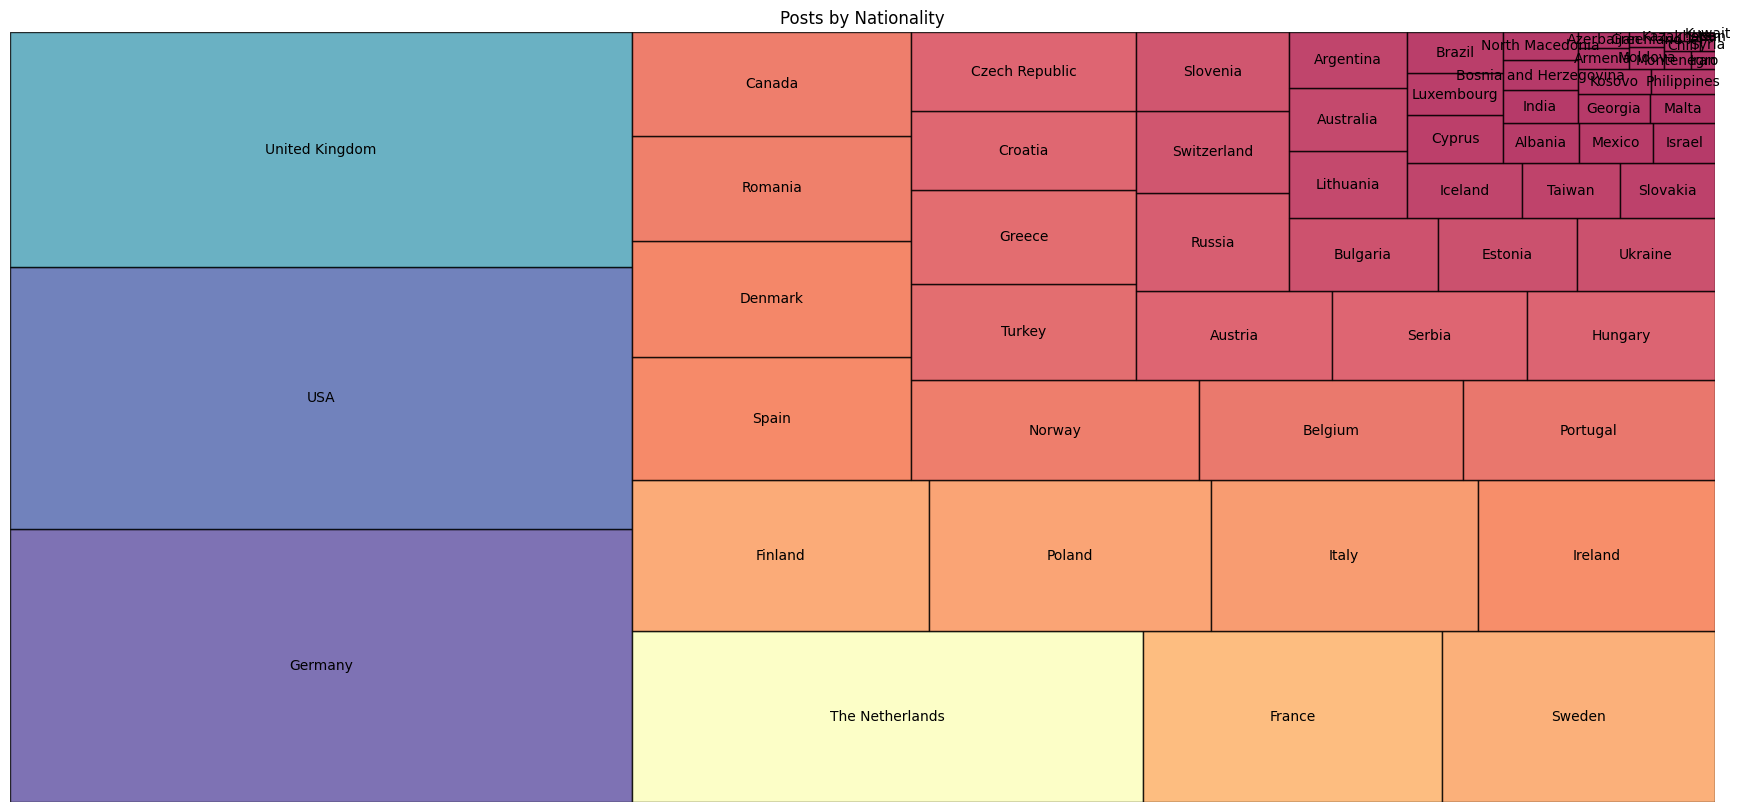

In [ ]:
import squarify

# Create a color palette
cmap = plt.cm.Spectral
mini=min(nationality_counts.values)
maxi=max(nationality_counts.values)
norm = plt.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in nationality_counts.values]

# Plot
plt.figure(figsize=(22, 10))
squarify.plot(sizes=nationality_counts.values, label=nationality_counts.index, alpha=0.8, color=colors, ec='black')
plt.title('Posts by Nationality')
plt.axis('off')
plt.show()


In [ ]:
# Count posts by nationality
nationality_counts = cleaned_nationality_df['nationality'].value_counts()

# Plotting
plt.subplot(1, 2, 2)
sns.barplot(x=nationality_counts.index, y=nationality_counts.values)
plt.title('Posts by Nationality')
plt.xticks(rotation=60)
plt.show()


In [ ]:
# Define the number of top nationalities to display
top_n = 10

# Calculate post counts for each nationality
nationality_counts = cleaned_nationality_df['nationality'].value_counts()

# Filter for top N nationalities
top_nationalities = nationality_counts.head(top_n)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_nationalities.values, y=top_nationalities.index)
plt.title(f'Top {top_n} Nationalities in Posts')
plt.xlabel('Number of Posts')
plt.ylabel('Nationality')
plt.show()


In [ ]:
cleaned_nationality.groupby('nationality').count()

In [ ]:
#also remove the dutch and german stopwords
def remove_additional_stopwords(cleaned_text):
    words = cleaned_text.split()
    words_filtered = [word for word in words if word not in combined_stopwords]
    return ' '.join(words_filtered)

cleaned_nationality['cleaned_post'] = cleaned_nationality['cleaned_post'].apply(remove_additional_stopwords)


In [ ]:
# Filter for top 4 nationalities
nationalities = ['United Kingdom', 'USA', 'Germany', 'The Netherlands']

cleaned_nationality_filtered = cleaned_nationality[cleaned_nationality['nationality'].isin(nationalities)]
cleaned_nationality_filtered.groupby('nationality').count()

,Unnamed: 0.1,Unnamed: 0,author_ID,post,cleaned_post,is_repeating
nationality,,,,,,
Germany,21187,21187,21187,21187,21187,21187
The Netherlands,10899,10899,10899,10899,10899,10899
USA,20376,20376,20376,20376,20376,20376
United Kingdom,18251,18251,18251,18251,18251,18251


In [ ]:
cleaned_nationality_filtered.to_csv('/content/drive/MyDrive/Colab Notebooks/cleaned_nationality_filtered.csv')

Logistic Regression model voor nationality

In [ ]:
# Feature extraction using TF-IDF, and also remove english stopwords
tfidf_vectorizer = TfidfVectorizer(max_features=10000, stop_words='english', ngram_range=(1,2))

In [ ]:
# Apply TF-IDF to the cleaned posts
X = tfidf_vectorizer.fit_transform(cleaned_nationality_filtered['cleaned_post'])
y = cleaned_nationality_filtered['nationality']

In [ ]:
print(X.shape)

(70713, 5000)


In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
#split data
X_train_nationality, X_test_nationality, y_train_nationality, y_test_nationality  = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)


In [ ]:
# Initialize and train the logistic regression model
lr_model = LogisticRegression(multi_class='multinomial', max_iter=1000)
lr_model.fit(X_train_nationality, y_train_nationality)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
# Predictions
y_pred_nationality = lr_model.predict(X_test_nationality)


In [ ]:
# Evaluation
print(f'Accuracy: {accuracy_score(y_test_nationality, y_pred_nationality)}')
print(classification_report(y_test_nationality, y_pred_nationality, target_names=label_encoder.classes_, digits=4))

Accuracy: 0.9275966909425157
                 precision    recall  f1-score   support

        Germany     0.9348    0.9174    0.9260      4238
The Netherlands     0.9474    0.8592    0.9011      2180
            USA     0.9006    0.9610    0.9298      4075
 United Kingdom     0.9407    0.9430    0.9419      3650

       accuracy                         0.9276     14143
      macro avg     0.9309    0.9201    0.9247     14143
   weighted avg     0.9284    0.9276    0.9274     14143



In [ ]:
y_pred_prob_nationality = lr_model.predict_proba(X_test_nationality)

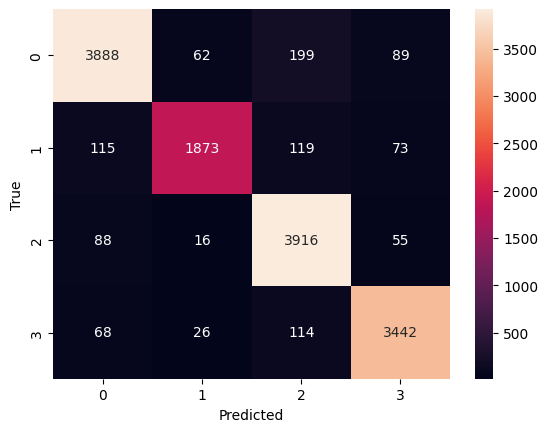

In [ ]:
cm = confusion_matrix(y_test_nationality, y_pred_nationality)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_model, X, y_encoded, cv=5, scoring='accuracy')
print("Cross-validated scores:", scores)


Cross-validated scores: [0.85420349 0.85399137 0.84076929 0.85518314 0.78821949]


In [ ]:


# Get feature names from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Number of top features to display for each class
top_n = 50

# Get the coefficients from the logistic regression model
coefficients = lr_model.coef_

# Iterate over each class
for i, class_label in enumerate(label_encoder.classes_):
    class_coefficients = coefficients[i]

    # Get the top feature indices for this class
    top_feature_indices = np.argsort(class_coefficients)[-top_n:]

    # Get the names and values of these features
    top_features = [(feature_names[j], class_coefficients[j]) for j in top_feature_indices]

    # Print the top features for this class
    print(f"Top features for '{class_label}':")
    for feature, value in top_features:
        print(f"  {feature}: {value}")
    print("\n")


Top features for 'Germany':
  finde: 2.0666309828659766
  danke: 2.0899627557948257
  capitalism: 2.1222552239079135
  essence: 2.1249982223551798
  hm: 2.1319151951889284
  yes: 2.136195717882664
  gpu: 2.150734184695939
  deutschland: 2.1550586874393787
  write: 2.1585082005312386
  wall text: 2.159950699266017
  additional: 2.160589656503913
  money: 2.1746362757000055
  dmg: 2.177076771516092
  actual: 2.1780030312617087
  leider: 2.1950673388647317
  live germany: 2.2229285761258626
  usa: 2.2334025098859476
  ne: 2.274156475367633
  problem: 2.2809019422739842
  stupid: 2.2972339312745347
  ps: 2.3721771998466825
  totally: 2.390211771251151
  bayern: 2.427067175025571
  absolutely: 2.429258902347118
  sadly: 2.492604572097677
  weiß: 2.522649861925104
  tho: 2.53450223819072
  nz: 2.552803790438746
  eu: 2.577246513686091
  cunt cunt: 2.5967060915903932
  somebody: 2.6024788825661913
  eigentlich: 2.663989449575232
  course: 2.6663950893051327
  relationship: 2.6721324861478952


-----------------------------------
naive bayes

In [ ]:
# Initialize the Multinomial Naive Bayes classifier
mnb_model = MultinomialNB()

In [ ]:
# Train the model
mnb_model.fit(X_train_nationality, y_train_nationality)

MultinomialNB()

In [ ]:
# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

In [ ]:
# Get log probabilities
log_prob = mnb_model.feature_log_prob_

In [ ]:
# Exponentiate to get actual probabilities
prob = np.exp(log_prob)

In [ ]:
# For each class, print the top N words
top_n = 50

# Iterate over each class
for i, class_label in enumerate(label_encoder.classes_):
    class_log_probs = log_prob[i]

    # Get the top feature indices for this class
    top_feature_indices = np.argsort(class_log_probs)[-top_n:]

    # Get the names and values of these features
    top_features = [(feature_names[j], class_log_probs[j]) for j in top_feature_indices]

    # Print the top features for this class
    print(f"Top features for '{class_label}':")
    for feature, value in reversed(top_features):
        print(f"  {feature}: {value.4f}")
    print("\n")

Top features for 'Germany':
  stuff: -7.067213428565106
  pretty: -7.063882850598575
  big: -7.0532333087031365
  make: -7.039972492638989
  eher: -7.039482257571796
  long: -7.031341682752388
  yeah: -7.027670866195228
  money: -7.022201174552866
  hi: -7.010846718281452
  new: -7.00420917697986
  maybe: -6.991900001912996
  day: -6.979143334653912
  come: -6.975186871813298
  probably: -6.958950737742067
  point: -6.947705352856655
  eu: -6.940483693463568
  try: -6.890413063412563
  yes: -6.871368424740455
  leute: -6.864793807554807
  play: -6.8328954370531925
  lot: -6.820440840350615
  ukraine: -6.819273671992167
  say: -6.790204287082559
  use: -6.771609938645543
  bad: -6.771464677175553
  problem: -6.765467306065923
  actually: -6.763213073747795
  russia: -6.722357385527254
  year: -6.689113070041169
  country: -6.665729373788128
  right: -6.648136405339639
  mean: -6.633964663635736
  look: -6.627101009093249
  way: -6.612131488783839
  need: -6.542423283344819
  work: -6.53

In [ ]:
y_pred_mnb = mnb_model.predict(X_test_nationality)

In [ ]:
# Evaluation
print(f'Accuracy: {accuracy_score(y_test_nationality, y_pred_mnb)}')
print(classification_report(y_test_nationality, y_pred_mnb, target_names=label_encoder.classes_, digits=4))


Accuracy: 0.8004666619529096
                 precision    recall  f1-score   support

        Germany     0.9881    0.6255    0.7661      4238
The Netherlands     0.9548    0.6592    0.7799      2180
            USA     0.6561    0.9791    0.7857      4075
 United Kingdom     0.8371    0.8885    0.8620      3650

       accuracy                         0.8005     14143
      macro avg     0.8590    0.7881    0.7984     14143
   weighted avg     0.8484    0.8005    0.7986     14143



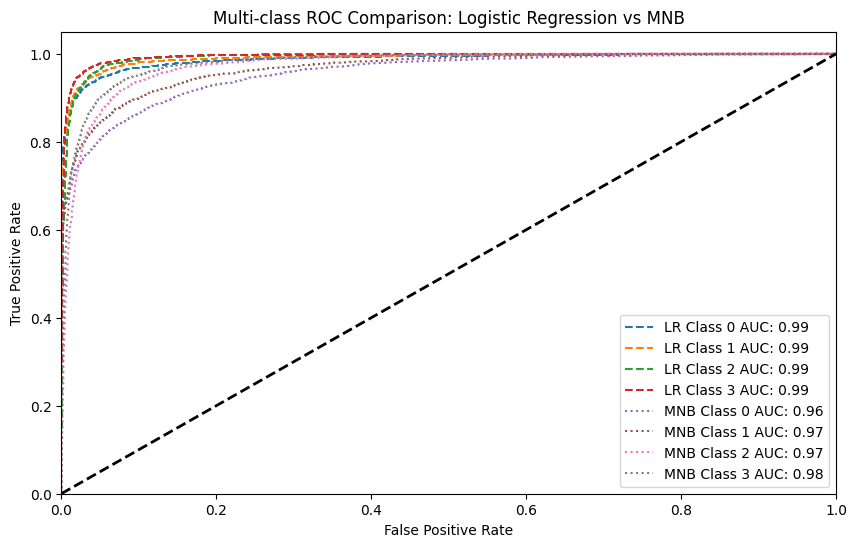

In [ ]:
n_classes = len(np.unique(y_train_nationality))

# Binarize the output
y_train_bin = label_binarize(y_train_nationality, classes=np.unique(y_train_nationality))
y_test_bin = label_binarize(y_test_nationality, classes=np.unique(y_test_nationality))

def compute_roc_auc(model, X_test_nationality, y_test_nationality):
    y_score = model.predict_proba(X_test_nationality)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_nationality[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    return fpr, tpr, roc_auc

# Compute ROC AUC for both models
fpr_lr, tpr_lr, roc_auc_lr = compute_roc_auc(lr_model, X_test_nationality, y_test_bin)
fpr_mnb, tpr_mnb, roc_auc_mnb = compute_roc_auc(mnb_model, X_test_nationality, y_test_bin)

# Plotting
plt.figure(figsize=(10, 6))

# Plot ROC for Logistic Regression
for i in range(n_classes):
    plt.plot(fpr_lr[i], tpr_lr[i], linestyle='--',
             label=f'LR Class {i} AUC: {roc_auc_lr[i]:.2f}')

# Plot ROC for MultinomialNB
for i in range(n_classes):
    plt.plot(fpr_mnb[i], tpr_mnb[i], linestyle=':',
             label=f'MNB Class {i} AUC: {roc_auc_mnb[i]:.2f}')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Comparison: Logistic Regression vs MNB')
plt.legend(loc="lower right")
plt.show()

Baseline Model

In [ ]:
#baseline model for nationality

dummy_clf_nationality = DummyClassifier(strategy="most_frequent")

dummy_clf_nationality.fit(X_train_nationality, y_train_nationality)

nationality_pred = dummy_clf_nationality.predict(X_test_nationality)

accuracy_nationality = accuracy_score(y_test_nationality, nationality_pred)

print(f"Dummy Classifier (Majority Baseline) Accuracy for Nationality: {accuracy_nationality}")


Dummy Classifier (Majority Baseline) Accuracy for Nationality: 0.2996535388531429
